In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [16]:
iris = pd.read_csv("iris.csv")

In [17]:
iris

,petal_length,petal_width,sepal_length,sepal_width,species_type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
iris.drop(["sepal_length", "sepal_width", "species_type"], axis="columns", inplace=True)

In [19]:
iris

,petal_length,petal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


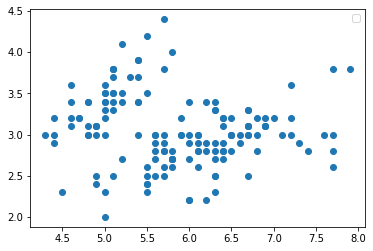

In [20]:
plt.scatter(iris["petal_length"], iris["petal_width"])
plt.legend()

In [21]:
km=KMeans(n_clusters=3)

In [22]:
km

KMeans(n_clusters=3)

In [29]:
y_predicted = km.fit_predict(iris[["petal_length", "petal_width"]])

In [30]:
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [31]:
iris["cluster"] = y_predicted #we are adding another column ie cluster

In [32]:
iris

,petal_length,petal_width,cluster
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,0
147,6.5,3.0,1
148,6.2,3.4,1


In [53]:
km.cluster_centers_

array([[6.73636364, 3.07727273],
       [5.15238095, 3.52857143],
       [6.16190476, 3.07619048],
       [5.52857143, 4.04285714],
       [4.9       , 2.33333333],
       [6.275     , 2.56875   ],
       [7.50909091, 3.13636364],
       [5.628     , 2.704     ],
       [4.70952381, 3.15238095]])

In [33]:
iris1 = iris[iris.cluster == 0]
iris2 = iris[iris.cluster == 1]
iris3= iris[iris.cluster == 2]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


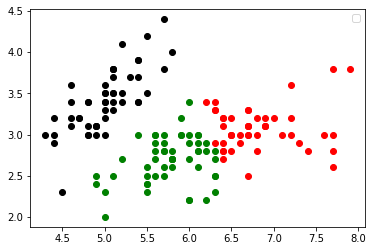

In [54]:
plt.scatter(iris1["petal_length"], iris1["petal_width"], color = "green")
plt.scatter(iris2["petal_length"], iris2["petal_width"], color ="red")
plt.scatter(iris3["petal_length"], iris3["petal_width"], color ="black")
#plt.scatter(iris.cluster_centers_[:,0], iris.cluster_centers_[:, 1], color="purple", marker="*",label="centroid")

plt.legend()

In [43]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(iris[["petal_length", "petal_width"]])
    sse.append(km.inertia_)
    

In [44]:
sse

[130.18093333333337,
 57.98240604207879,
 37.12370212765957,
 27.95870982492085,
 20.95154172773963,
 17.515727185611084,
 15.341064513556617,
 12.791785714285716,
 10.966561147186146]

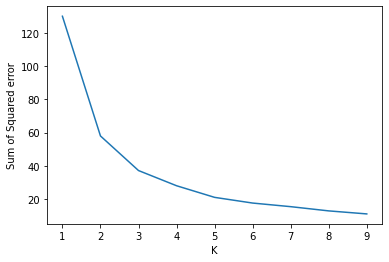

In [55]:
plt.xlabel("K")
plt.ylabel("Sum of Squared error")
plt.plot(k_range, sse)#we plot the graph of k_range and sse